<a href="https://colab.research.google.com/github/Nivethanajacob/ict_project1/blob/main/Intermediate_Supervised_Assesment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [38]:
training_data=pd.read_csv('/content/train_LZdllcl.csv')
training_data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


#EDA

In [39]:
training_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [40]:
training_data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [41]:
training_data.shape

(54808, 14)

In [42]:
training_data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
54803,False
54804,False
54805,False
54806,False


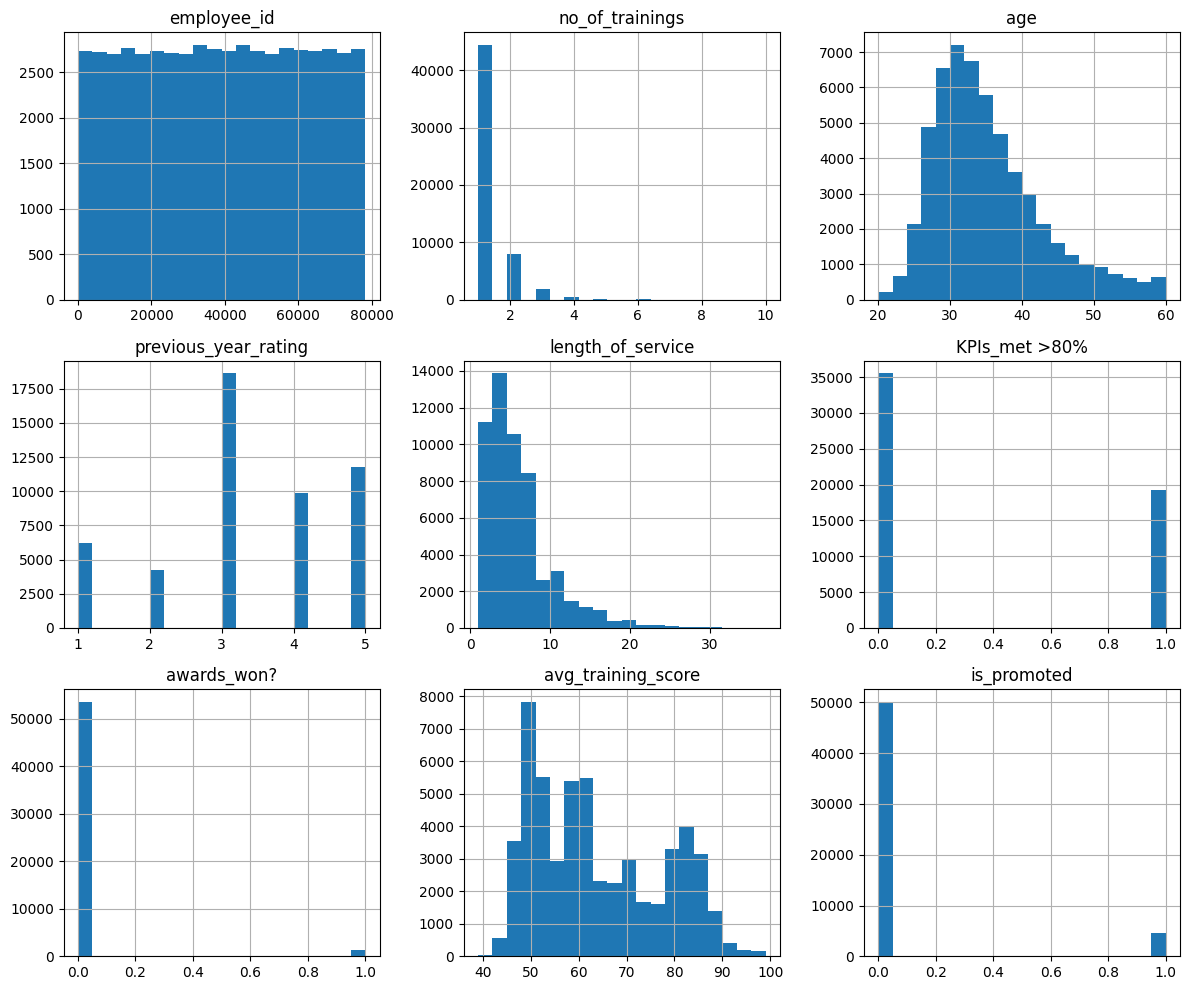

In [43]:
training_data.select_dtypes(include=["number"]).hist(figsize=(12,10), bins=20)
plt.tight_layout()
plt.show()


# Handling missing value

In [44]:
training_data.isnull().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


In [45]:
training_data['education'] = training_data['education'].fillna(training_data['education'].mode()[0])

In [46]:
training_data['previous_year_rating']=training_data['previous_year_rating'].fillna(training_data['previous_year_rating'].median())

In [47]:
training_data.isnull().sum()


,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


#Outlier handling

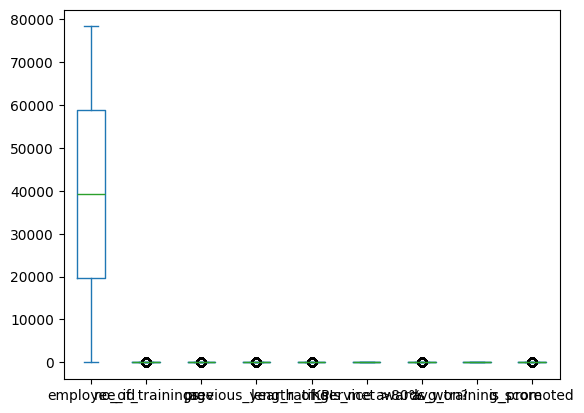

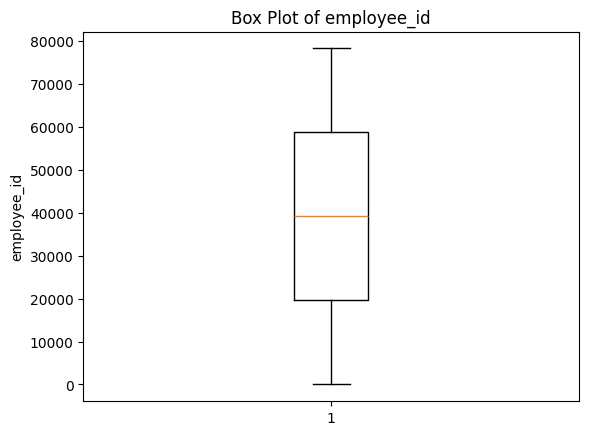

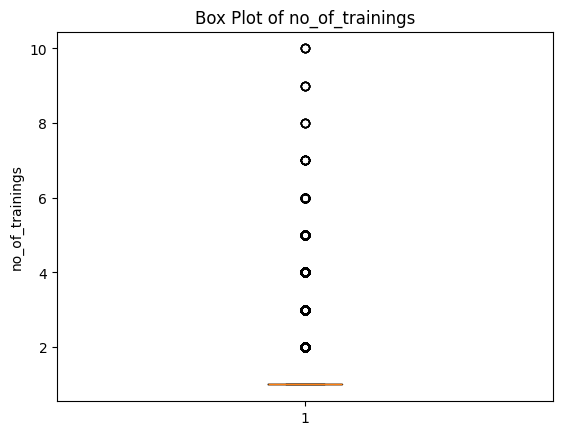

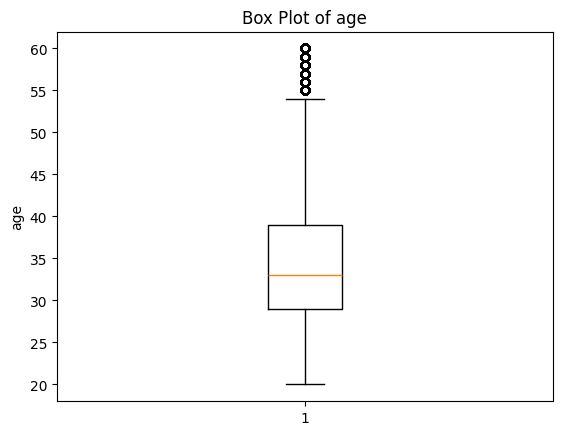

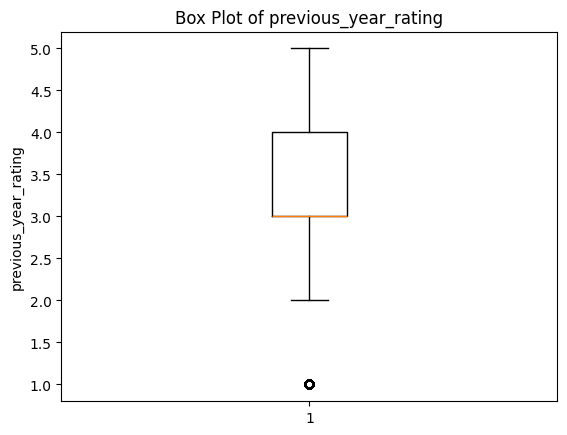

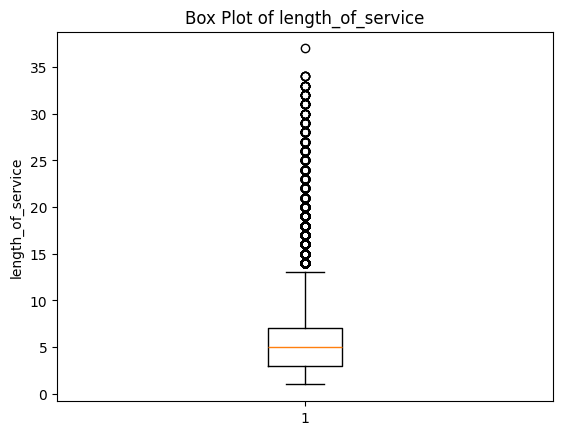

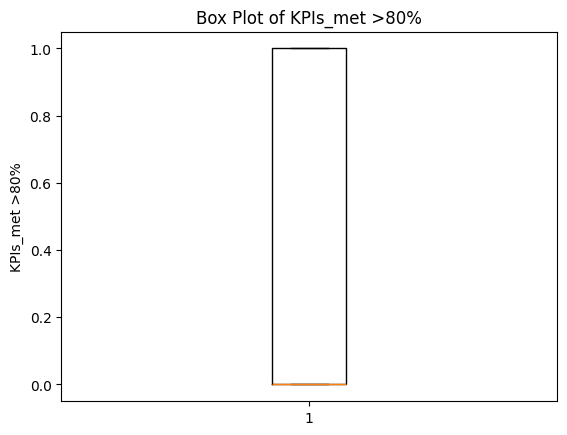

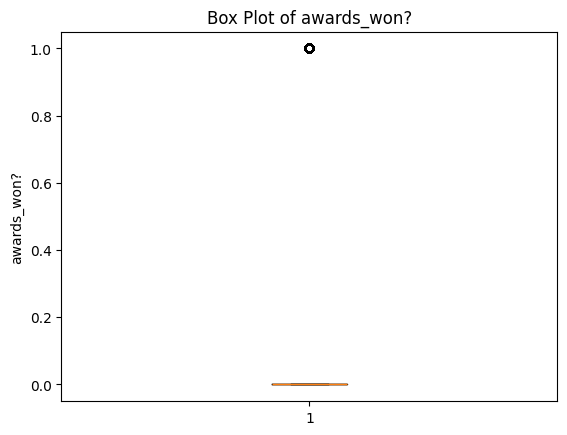

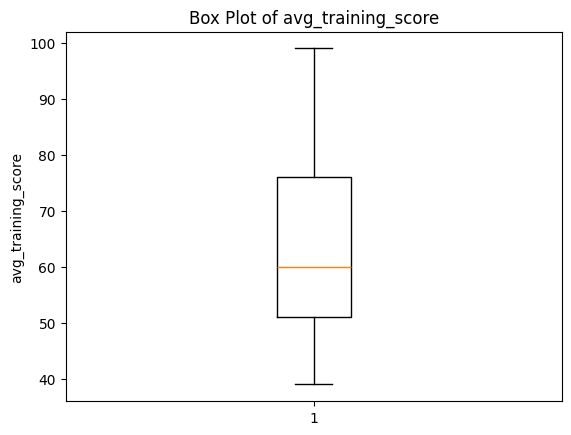

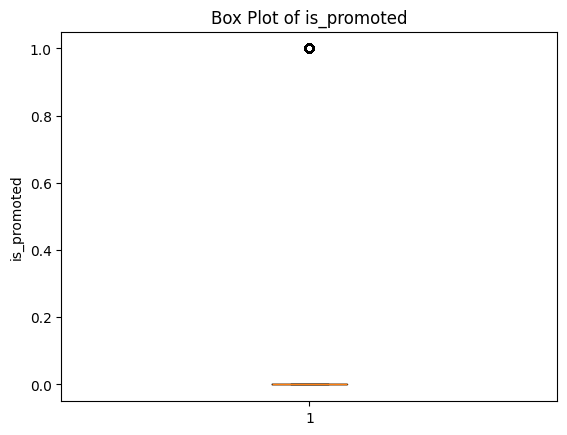

In [48]:
training_data.plot(kind='box');

num_cols = training_data.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    plt.figure()
    plt.boxplot(training_data[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

In [49]:
numerical_data = list(training_data.select_dtypes(include=["number"]).columns)
categorical_data = list(training_data.select_dtypes(include=["object"]).columns)

train_data = training_data[numerical_data]
corr = train_data.corr()
corr

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004209,0.001274,-0.002501,0.008420,-0.000586,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.061564,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.000437,-0.081278,1.000000,0.026810,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,0.004209,-0.061564,0.026810,1.000000,0.023504,0.337367,0.026587,0.071926,0.153230
length_of_service,0.001274,-0.057275,0.657111,0.023504,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.002501,-0.045576,-0.025592,0.337367,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,0.008420,-0.007628,-0.008169,0.026587,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,-0.000586,0.042517,-0.048380,0.071926,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.153230,-0.010670,0.221582,0.195871,0.181147,1.000000


<Axes: >

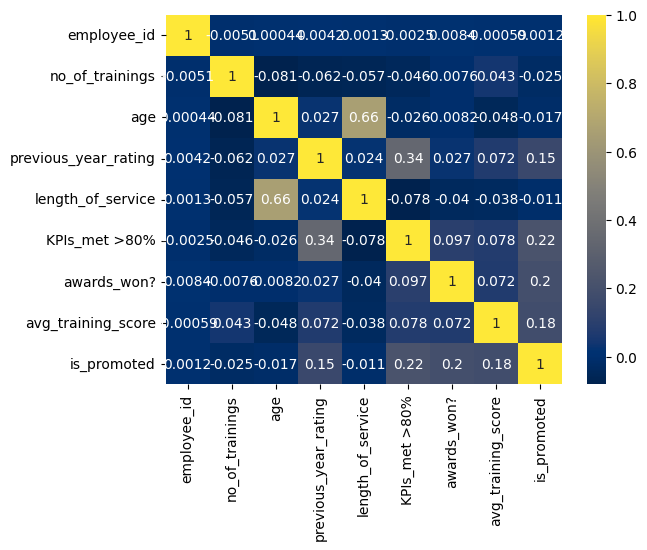

In [50]:
sns.heatmap(corr,annot=True,cmap='cividis')

#Encoding


In [51]:
categorical_cols = ['department', 'region', 'education', 'gender', 'recruitment_channel']
train_encode= pd.get_dummies(training_data, columns=categorical_cols, drop_first=True, dtype=int)
train_encode

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,1,35,5.0,8,1,0,49,0,0,...,0,0,1,0,0,0,1,0,0,1
1,65141,1,30,5.0,4,0,0,60,0,0,...,0,0,0,0,0,0,0,1,0,0
2,7513,1,34,3.0,7,0,0,50,0,0,...,0,0,0,0,0,0,0,1,0,1
3,2542,2,39,1.0,10,0,0,50,0,0,...,0,0,0,0,0,0,0,1,0,0
4,48945,1,45,3.0,2,0,0,73,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,1,48,3.0,17,0,0,78,0,0,...,0,0,0,0,0,0,0,1,0,1
54804,74592,1,37,2.0,6,0,0,56,0,0,...,0,0,0,0,0,0,1,0,0,0
54805,13918,1,27,5.0,3,1,0,79,0,0,...,0,0,0,0,0,0,0,1,0,0
54806,13614,1,29,1.0,2,0,0,45,0,0,...,0,0,0,0,1,0,0,1,0,1


In [52]:
X = train_encode.drop(["employee_id", "is_promoted"], axis=1)
y = train_encode["is_promoted"]

In [53]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

#Scaling

In [54]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)

#Logistic Regression

In [55]:
# Logistic Regression model
log_reg_model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)

log_reg_model.fit(X_train_scaled, y_train)

y_pred = log_reg_model.predict(X_val_scaled)
y_prob = log_reg_model.predict_proba(X_val_scaled)[:, 1]

print(" Logistic Regression")
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1-score:", f1_score(y_val, y_pred))
print("ROC-AUC:", roc_auc_score(y_val, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

 Logistic Regression
Accuracy: 0.7640029191753329
Precision: 0.2406652023846878
Recall: 0.8211991434689507
F1-score: 0.3722397476340694
ROC-AUC: 0.8763909661086005
Confusion Matrix:
 [[7608 2420]
 [ 167  767]]


#KNN

##Euclidean

In [56]:
roc_scores = []
k_values = range(1, 20)

for k in k_values:
    knn = KNeighborsClassifier(
        n_neighbors=k,
        metric='euclidean',
        weights='distance'
    )

    knn.fit(X_train_scaled, y_train)
    y_val_prob = knn.predict_proba(X_val_scaled)[:, 1]

    roc = roc_auc_score(y_val, y_val_prob)
    roc_scores.append(roc)

# Best k
best_k = k_values[np.argmax(roc_scores)]
print("Best k:", best_k)

KNN_classifier = KNeighborsClassifier(
    n_neighbors=best_k,
    metric='euclidean',
    weights='distance'
)

KNN_classifier.fit(X_train_scaled, y_train)

y_pred_knn = KNN_classifier.predict(X_val_scaled)
y_prob_knn = KNN_classifier.predict_proba(X_val_scaled)[:, 1]

print(" KNN (Euclidean)")
print("Accuracy:", accuracy_score(y_val, y_pred_knn))
print("Precision:", precision_score(y_val, y_pred_knn))
print("Recall:", recall_score(y_val, y_pred_knn))
print("F1-score:", f1_score(y_val, y_pred_knn))
print("ROC-AUC:", roc_auc_score(y_val, y_prob_knn))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_knn))


Best k: 19
 KNN (Euclidean)
Accuracy: 0.9116949461777047
Precision: 0.25
Recall: 0.018201284796573874
F1-score: 0.033932135728542916
ROC-AUC: 0.7777102058561509
Confusion Matrix:
 [[9977   51]
 [ 917   17]]


##Manhattan

In [57]:
roc_scores = []
k_values = range(1, 20)

for k in k_values:
    knn = KNeighborsClassifier(
        n_neighbors=k,
        metric='manhattan',
        weights='distance'
    )

    knn.fit(X_train_scaled, y_train)
    y_val_prob = knn.predict_proba(X_val_scaled)[:, 1]

    roc = roc_auc_score(y_val, y_val_prob)
    roc_scores.append(roc)

# Best k
best_k = k_values[np.argmax(roc_scores)]
print("Best k (Manhattan):", best_k)

KNN_classifier = KNeighborsClassifier(
    n_neighbors=best_k,
    metric='manhattan',
    weights='distance'
)

KNN_classifier.fit(X_train_scaled, y_train)

y_pred_knn = KNN_classifier.predict(X_val_scaled)
y_prob_knn = KNN_classifier.predict_proba(X_val_scaled)[:, 1]

print("Model: KNN (Manhattan Distance)")
print("Accuracy:", accuracy_score(y_val, y_pred_knn))
print("Precision:", precision_score(y_val, y_pred_knn))
print("Recall:", recall_score(y_val, y_pred_knn))
print("F1-score:", f1_score(y_val, y_pred_knn))
print("ROC-AUC:", roc_auc_score(y_val, y_prob_knn))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_knn))

Best k (Manhattan): 19
Model: KNN (Manhattan Distance)
Accuracy: 0.9116037219485496
Precision: 0.23880597014925373
Recall: 0.017130620985010708
F1-score: 0.03196803196803197
ROC-AUC: 0.7802117134122959
Confusion Matrix:
 [[9977   51]
 [ 918   16]]


#Navie Bayes

In [58]:
# Initialize the Naive Bayes model
naive_bayes_classifier = GaussianNB()

# Train the model on the training data
naive_bayes_classifier.fit(X_train_scaled, y_train)

# Predict class labels on the validation set
y_pred_nb = naive_bayes_classifier.predict(X_val_scaled)

# Predict probabilities for the positive class (for ROC-AUC)
y_prob_nb = naive_bayes_classifier.predict_proba(X_val_scaled)[:, 1]

# Evaluate the model
Acc_nb  = accuracy_score(y_val, y_pred_nb)
Prec_nb = precision_score(y_val, y_pred_nb)
Rec_nb  = recall_score(y_val, y_pred_nb)
F1_nb   = f1_score(y_val, y_pred_nb)
ROC_nb  = roc_auc_score(y_val, y_prob_nb)
CM_nb   = confusion_matrix(y_val, y_pred_nb)

# Print metrics
print("Naive Bayes (Gaussian)")
print("Accuracy:", Acc_nb)
print("Precision:", Prec_nb)
print("Recall:", Rec_nb)
print("F1-score:", F1_nb)
print("ROC-AUC:", ROC_nb)
print("Confusion Matrix:\n", CM_nb)


Naive Bayes (Gaussian)
Accuracy: 0.5913154533844189
Precision: 0.14454691259021651
Recall: 0.771948608137045
F1-score: 0.24349881796690306
ROC-AUC: 0.710997216359504
Confusion Matrix:
 [[5761 4267]
 [ 213  721]]


#Decision Tree

In [59]:

# Initialize Decision Tree
DT_classifier = DecisionTreeClassifier(random_state=42)  # add random_state for reproducibility

# Train the model
DT_classifier.fit(X_train, y_train)

# Predict on validation set
y_pred_dt  = DT_classifier.predict(X_val)
y_prob_dt  = DT_classifier.predict_proba(X_val)[:, 1]  # probabilities for ROC-AUC

# Evaluate the model
Acc_dt   = accuracy_score(y_val, y_pred_dt)
Prec_dt  = precision_score(y_val, y_pred_dt, average='binary')
Rec_dt   = recall_score(y_val, y_pred_dt, average='binary')
F1_dt    = f1_score(y_val, y_pred_dt, average='binary')
ROC_dt   = roc_auc_score(y_val, y_prob_dt)
CM_dt    = confusion_matrix(y_val, y_pred_dt)

# Print metrics
print(" Decision Tree ")
print("Accuracy:", Acc_dt)
print("Precision:", Prec_dt)
print("Recall:", Rec_dt)
print("F1-score:", F1_dt)
print("ROC-AUC:", ROC_dt)
print("Confusion Matrix:\n", CM_dt)


 Decision Tree 
Accuracy: 0.8967341725962416
Precision: 0.4048076923076923
Recall: 0.45074946466809424
F1-score: 0.4265450861195542
ROC-AUC: 0.6944837645171678
Confusion Matrix:
 [[9409  619]
 [ 513  421]]


In [60]:

# Initialize Random Forest
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight="balanced",  # handles imbalanced data
    random_state=42,
    n_jobs=-1
)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on validation set
y_pred_rf  = rf_model.predict(X_val)
y_prob_rf  = rf_model.predict_proba(X_val)[:, 1]  # probabilities for ROC-AUC

# Evaluate the model
Acc_rf   = accuracy_score(y_val, y_pred_rf)
Prec_rf  = precision_score(y_val, y_pred_rf)
Rec_rf   = recall_score(y_val, y_pred_rf)
F1_rf    = f1_score(y_val, y_pred_rf)
ROC_rf   = roc_auc_score(y_val, y_prob_rf)
CM_rf    = confusion_matrix(y_val, y_pred_rf)

# Print metrics
print(" Random Forest ")
print("Accuracy:", Acc_rf)
print("Precision:", Prec_rf)
print("Recall:", Rec_rf)
print("F1-score:", F1_rf)
print("ROC-AUC:", ROC_rf)
print("Confusion Matrix:\n", CM_rf)


 Random Forest 
Accuracy: 0.7147418354314906
Precision: 0.21121938372399263
Recall: 0.8586723768736617
F1-score: 0.33904037201437326
ROC-AUC: 0.8702351830292739
Confusion Matrix:
 [[7033 2995]
 [ 132  802]]


#Fune-Tuning


In [61]:

# Randomized Search for KNN
random_knn = RandomizedSearchCV(
    estimator=KNeighborsClassifier(),
    param_distributions={
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    n_iter=10,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)

# Train on training data
random_knn.fit(X_train_scaled, y_train)

# Best KNN model
best_knn = random_knn.best_estimator_

print("Best Parameters:", random_knn.best_params_)
print("Best CV ROC-AUC:", random_knn.best_score_)

# Predict on validation set
y_pred_knn = best_knn.predict(X_val_scaled)
y_prob_knn = best_knn.predict_proba(X_val_scaled)[:, 1]

# Evaluate metrics
print("Test Accuracy:", accuracy_score(y_val, y_pred_knn))
print("Test ROC-AUC:", roc_auc_score(y_val, y_prob_knn))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_knn))


Best Parameters: {'weights': 'uniform', 'n_neighbors': 11, 'metric': 'manhattan'}
Best CV ROC-AUC: 0.7331812242357373
Test Accuracy: 0.9136106549899653
Test ROC-AUC: 0.746710655560576
Confusion Matrix:
 [[10000    28]
 [  919    15]]


In [62]:

# Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# Parameter grid (only compatible combinations)
param_distributions = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'none'],        # removed 'elasticnet' for simplicity
    'solver': ['saga', 'liblinear']         # saga supports l1/l2/none, liblinear supports l1/l2
}

# Randomized Search CV
random_logreg = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_distributions,
    n_iter=10,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)

# Fit on training data
random_logreg.fit(X_train_scaled, y_train)

# Best Logistic Regression model
best_logreg = random_logreg.best_estimator_

print("Best Parameters:", random_logreg.best_params_)
print("Best CV ROC-AUC:", random_logreg.best_score_)

# Predict on validation set
y_pred_logreg = best_logreg.predict(X_val_scaled)
y_prob_logreg = best_logreg.predict_proba(X_val_scaled)[:, 1]

# Evaluate metrics
print("Test Accuracy:", accuracy_score(y_val, y_pred_logreg))
print("Test ROC-AUC:", roc_auc_score(y_val, y_prob_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_logreg))


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
9 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_pa

Best Parameters: {'solver': 'saga', 'penalty': 'l1', 'C': 1}
Best CV ROC-AUC: 0.8755159521616043
Test Accuracy: 0.7661923006750593
Test ROC-AUC: 0.8770271932379489
Confusion Matrix:
 [[7634 2394]
 [ 169  765]]


#Test data

In [63]:
testing_data=pd.read_csv('/content/test_2umaH9m.csv')
testing_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [64]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [65]:
testing_data.isnull().sum()

,0
employee_id,0
department,0
region,0
education,1034
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,1812
length_of_service,0


#Handling missing values

In [66]:
testing_data['education'] = testing_data['education'].fillna(testing_data['education'].mode()[0])

In [67]:
testing_data['previous_year_rating']=testing_data['previous_year_rating'].fillna(testing_data['previous_year_rating'].median())

In [68]:
testing_data.isnull().sum()


,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


#encoding

In [69]:
categorical_test = list(testing_data.select_dtypes(include=["object"]).columns)
numerical_test = list(testing_data.select_dtypes(include=["number"]).columns)


In [70]:
testing_data_encode= pd.get_dummies(testing_data,  drop_first=True, dtype=int)

In [71]:
testing_data_encode = testing_data_encode.reindex(columns=X.columns, fill_value=0)
testing_data_encode

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,department_Legal,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,1,24,3.0,1,1,0,77,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,1,31,3.0,5,0,0,51,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,31,1.0,4,0,0,47,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,31,2.0,9,0,0,65,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,30,4.0,7,0,0,61,1,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,1,24,3.0,1,0,0,61,0,0,1,...,0,0,0,0,0,1,0,1,0,1
23486,1,31,3.0,7,0,0,74,0,0,0,...,0,0,0,0,0,0,0,1,0,1
23487,1,26,4.0,4,0,0,50,0,1,0,...,0,0,0,0,0,0,0,0,0,1
23488,3,27,3.0,1,0,0,70,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [72]:
testing_data_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 53 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   no_of_trainings               23490 non-null  int64  
 1   age                           23490 non-null  int64  
 2   previous_year_rating          23490 non-null  float64
 3   length_of_service             23490 non-null  int64  
 4   KPIs_met >80%                 23490 non-null  int64  
 5   awards_won?                   23490 non-null  int64  
 6   avg_training_score            23490 non-null  int64  
 7   department_Finance            23490 non-null  int64  
 8   department_HR                 23490 non-null  int64  
 9   department_Legal              23490 non-null  int64  
 10  department_Operations         23490 non-null  int64  
 11  department_Procurement        23490 non-null  int64  
 12  department_R&D                23490 non-null  int64  
 13  d

#Scaling

In [74]:
X_testing=testing_data_encode

In [75]:
X_testing_scaled=scaler.transform(X_testing)

In [82]:
testing_predictions=best_knn.predict(X_testing_scaled)

In [77]:
testing_predict=log_reg_model.predict(X_testing_scaled)

In [79]:
dt_testing_prediction=DT_classifier.predict(X_testing)
dt_testing_probab=DT_classifier.predict_proba(X_testing)[:,1]

#Submission

In [84]:
sample_data=pd.read_csv("/content/sample_submission_M0L0uXE.csv")
sample_data["is_promoted"]=testing_predictions
sample_data.to_csv("testing_predictions.csv",index=False)


In [86]:
sample_sub=pd.DataFrame({"employee_id":testing_data["employee_id"],"is_promoted":testing_predict})
sample_sub.to_csv("final_submission",index=False)

In [88]:
submit=pd.DataFrame({"employee_id":testing_data["employee_id"],"is_promoted":dt_testing_prediction})
submit.to_csv("final_submission_dt.csv",index=False)
